In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
data.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
data.shape

(2075259, 7)

In [7]:
#data.replace("?","NaN", inplace = True)

In [8]:
#Checking the null values before building a report
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
# Filling with mean
for col in data:
    data[col].fillna(np.mean, inplace = True)
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
#Downsample to daily data points
data_daily = data.resample('D').sum()
print(data_daily)

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16             1209.176  ...          4926.0
2006-12-17             3390.460  ...         13341.0
2006-12-18             2203.826  ...         14018.0
2006-12-19             1666.194  ...          6197.0
2006-12-20             2225.748  ...         14063.0
...                         ...  ...             ...
2010-11-22             2041.536  ...         10136.0
2010-11-23             1577.536  ...          7611.0
2010-11-24             1796.248  ...         12224.0
2010-11-25             1431.164  ...          5072.0
2010-11-26             1488.104  ...          9989.0

[1442 rows x 7 columns]


In [20]:
data_monthly['Global_active_power']

datetime
2006-12-31   NaN
2007-06-30   NaN
2007-12-31   NaN
2008-06-30   NaN
2008-12-31   NaN
2009-06-30   NaN
2009-12-31   NaN
2010-06-30   NaN
2010-12-31   NaN
Freq: 6M, Name: Global_active_power, dtype: float64

Text(0, 0.5, 'Global_active_power')

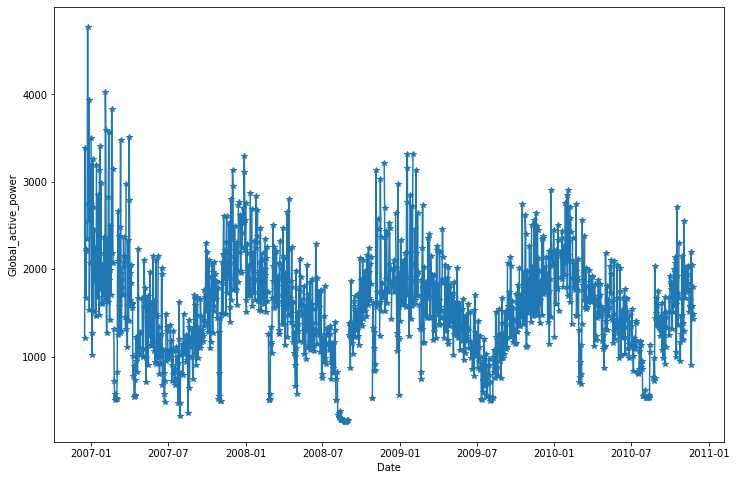

In [25]:
plt.figure(figsize=(12,8))
plt.plot(data_daily.index, data_daily.Global_active_power , '-',marker='*')
plt.xlabel('Date')
plt.ylabel('Global_active_power')


In [ ]:
group_1= data[['Global_active_power','Global_reactive_power']]
GP = pd.DataFrame(group_1)
GP.head()

In [ ]:
corr_matrix = GP.corr(method='pearson')
corr_matrix

In [ ]:
group_2= data[['Voltage','Global_intensity']]
V = pd.DataFrame(group_2)
V.head()

In [ ]:
corr_matrix = V.corr(method='pearson')
corr_matrix